# 1. Spam Classification via Naïve Bayes.


# 1-1

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    state = {}
    N = matrix.shape[1]

    # Compute the class priors and store them in state['class_priors']
    num_spam = np.sum(category)  # Number of spam documents in the training set
    num_ham = len(category) - num_spam  # Number of non-spam (ham) documents
    total_documents = len(category)  # Total number of documents

    state['class_priors'] = {
        'spam': (num_spam + 1) / (total_documents + 2),  # Laplace smoothing for class priors
        'ham': (num_ham + 1) / (total_documents + 2)
    }

    # Initialize dictionaries to store token counts for each class
    token_counts_spam = np.ones(N)  # Laplace smoothing for token counts
    token_counts_ham = np.ones(N)

    # Iterate over training documents and update token counts
    for i in range(total_documents):
        if category[i] == 1:  # Spam
            token_counts_spam += matrix[i]
        else:  # Ham
            token_counts_ham += matrix[i]

    # Compute the conditional probabilities for each token and each class
    # using Laplace smoothing and store them in state['log_probabilities']
    state['log_probabilities'] = {
        'spam': np.log(token_counts_spam / (np.sum(token_counts_spam) + N)),  # Laplace smoothing for probabilities
        'ham': np.log(token_counts_ham / (np.sum(token_counts_ham) + N))
    }

    return state

def nb_test(matrix, state):
    output = np.zeros(matrix.shape[0])

    # Iterate over test instances and classify them
    for i in range(matrix.shape[0]):
        log_likelihood_spam = np.sum(matrix[i] * state['log_probabilities']['spam'])
        log_likelihood_ham = np.sum(matrix[i] * state['log_probabilities']['ham'])

        # Compute the log-odds and assign the class with higher log-odds as the prediction
        log_odds_spam = log_likelihood_spam + np.log(state['class_priors']['spam'])
        log_odds_ham = log_likelihood_ham + np.log(state['class_priors']['ham'])

        if log_odds_spam > log_odds_ham:
            output[i] = 1  # Predicted as spam
        else:
            output[i] = 0  # Predicted as ham

    return output

def evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print('Error: %1.4f' % error)

def main():
    # Please set a training file that you want to use for this run below
    trainMatrix, tokenlist, trainCategory = readMatrix('./hw2_MATRIX.TRAIN')
    testMatrix, tokenlist, testCategory = readMatrix('./hw2_MATRIX.TEST')

    state = nb_train(trainMatrix, trainCategory)
    output = nb_test(testMatrix, state)

    evaluate(output, testCategory)

    return

if __name__ == '__main__':
    main()


Error: 0.0163


# 1-2

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    state = {}
    N = matrix.shape[1]

    # Compute the class priors and store them in state['class_priors']
    num_spam = np.sum(category)  # Number of spam documents in the training set
    num_ham = len(category) - num_spam  # Number of non-spam (ham) documents
    total_documents = len(category)  # Total number of documents

    state['class_priors'] = {
        'spam': (num_spam + 1) / (total_documents + 2),  # Laplace smoothing for class priors
        'ham': (num_ham + 1) / (total_documents + 2)
    }

    # Initialize dictionaries to store token counts for each class
    token_counts_spam = np.ones(N)  # Laplace smoothing for token counts
    token_counts_ham = np.ones(N)

    # Iterate over training documents and update token counts
    for i in range(total_documents):
        if category[i] == 1:  # Spam
            token_counts_spam += matrix[i]
        else:  # Ham
            token_counts_ham += matrix[i]

    # Compute the conditional probabilities for each token and each class
    # using Laplace smoothing and store them in state['log_probabilities']
    state['log_probabilities'] = {
        'spam': np.log(token_counts_spam / (np.sum(token_counts_spam) + N)),  # Laplace smoothing for probabilities
        'ham': np.log(token_counts_ham / (np.sum(token_counts_ham) + N))
    }

    return state

def nb_test(matrix, state):
    output = np.zeros(matrix.shape[0])

    # Iterate over test instances and classify them
    for i in range(matrix.shape[0]):
        log_likelihood_spam = np.sum(matrix[i] * state['log_probabilities']['spam'])
        log_likelihood_ham = np.sum(matrix[i] * state['log_probabilities']['ham'])

        # Compute the log-odds and assign the class with higher log-odds as the prediction
        log_odds_spam = log_likelihood_spam + np.log(state['class_priors']['spam'])
        log_odds_ham = log_likelihood_ham + np.log(state['class_priors']['ham'])

        if log_odds_spam > log_odds_ham:
            output[i] = 1  # Predicted as spam
        else:
            output[i] = 0  # Predicted as ham

    return output

def evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print('Error: %1.4f' % error)

def main():
    # Please set a training file that you want to use for this run below
    trainMatrix, tokenlist, trainCategory = readMatrix('./hw2_MATRIX.TRAIN')
    testMatrix, tokenlist, testCategory = readMatrix('./hw2_MATRIX.TEST')

    state = nb_train(trainMatrix, trainCategory)
    output = nb_test(testMatrix, state)

    # Compute log odds ratio for each token
    log_odds_ratios = np.log(np.exp(state['log_probabilities']['spam'] - state['log_probabilities']['ham']))

    # Get indices of top 5 tokens with highest positive log odds ratios
    top_5_tokens_indices = np.argsort(log_odds_ratios)[::-1][:5]

    # Load the token list from the file hw2_TOKENS_LIST
    with open('hw2_TOKENS_LIST.txt', 'r') as file:
        token_list = [line.strip() for line in file]

    # Print the top 5 tokens most indicative of the SPAM class
    print("Top 5 tokens most indicative of SPAM:")
    for index in top_5_tokens_indices:
        print(token_list[index])

    return

if __name__ == '__main__':
    main()

Top 5 tokens most indicative of SPAM:
616 httpaddr
1210 spam
1357 unsubscrib
394 ebai
1369 valet


# 1-3


Training set size: 50, Test Error: 0.0450
Training set size: 100, Test Error: 0.0288
Training set size: 200, Test Error: 0.0213
Training set size: 400, Test Error: 0.0163
Training set size: 800, Test Error: 0.0175
Training set size: 1400, Test Error: 0.0187


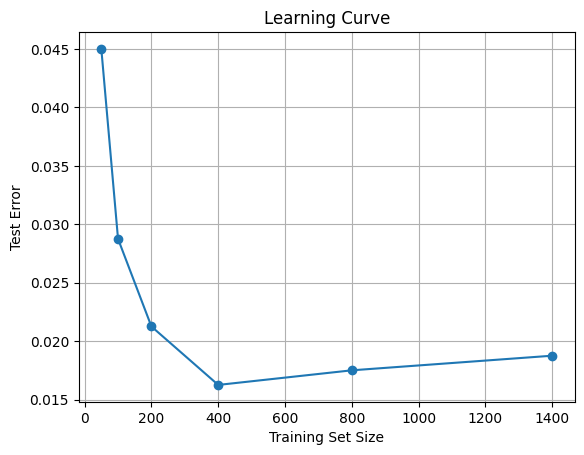

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    state = {}
    N = matrix.shape[1]

    # Compute the class priors and store them in state['class_priors']
    num_spam = np.sum(category)  # Number of spam documents in the training set
    num_ham = len(category) - num_spam  # Number of non-spam (ham) documents
    total_documents = len(category)  # Total number of documents

    state['class_priors'] = {
        'spam': (num_spam + 1) / (total_documents + 2),  # Laplace smoothing for class priors
        'ham': (num_ham + 1) / (total_documents + 2)
    }

    # Initialize dictionaries to store token counts for each class
    token_counts_spam = np.ones(N)  # Laplace smoothing for token counts
    token_counts_ham = np.ones(N)

    # Iterate over training documents and update token counts
    for i in range(total_documents):
        if category[i] == 1:  # Spam
            token_counts_spam += matrix[i]
        else:  # Ham
            token_counts_ham += matrix[i]

    # Compute the conditional probabilities for each token and each class
    # using Laplace smoothing and store them in state['log_probabilities']
    state['log_probabilities'] = {
        'spam': np.log(token_counts_spam / (np.sum(token_counts_spam) + N)),  # Laplace smoothing for probabilities
        'ham': np.log(token_counts_ham / (np.sum(token_counts_ham) + N))
    }

    return state

def nb_test(matrix, state):
    output = np.zeros(matrix.shape[0])

    # Iterate over test instances and classify them
    for i in range(matrix.shape[0]):
        log_likelihood_spam = np.sum(matrix[i] * state['log_probabilities']['spam'])
        log_likelihood_ham = np.sum(matrix[i] * state['log_probabilities']['ham'])

        # Compute the log-odds and assign the class with higher log-odds as the prediction
        log_odds_spam = log_likelihood_spam + np.log(state['class_priors']['spam'])
        log_odds_ham = log_likelihood_ham + np.log(state['class_priors']['ham'])

        if log_odds_spam > log_odds_ham:
            output[i] = 1  # Predicted as spam
        else:
            output[i] = 0  # Predicted as ham

    return output

def evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print('Error: %1.4f' % error)

# Define a list of training set sizes to experiment with
training_set_sizes = [50, 100, 200, 400, 800, 1400]

def main():
    test_errors = []

    # Load the test data once since it doesn't change
    testMatrix, _, testCategory = readMatrix('./hw2_MATRIX.TEST')

    for train_size in training_set_sizes:
        # Construct the path to the training file based on the current size
        train_file = f'./hw2_MATRIX.TRAIN.{train_size}'

        # Read the training data for the current size
        trainMatrix, _, trainCategory = readMatrix(train_file)

        # Train the Naive Bayes classifier
        state = nb_train(trainMatrix, trainCategory)

        # Test the classifier
        output = nb_test(testMatrix, state)

        # Calculate and store the test error for this training set size
        error = (output != testCategory).sum() / len(output)
        test_errors.append(error)

        print(f"Training set size: {train_size}, Test Error: {error:.4f}")

    # Plot the learning curve
    plt.figure()
    plt.plot(training_set_sizes, test_errors, marker='o', linestyle='-')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Test Error')
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()


#2. Spam Classification via SVM


# 2-1

In [22]:
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


def svm_readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    category = (np.array(Y) * 2) - 1
    return matrix, tokens, category


def svm_test(svm, matrix):
    output = svm.predict(matrix)
    return output

def svm_evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print('Error: %1.4f' % error)
    return error

def main():
    # Please set a training file that you want to use for this run below
    trainMatrix, tokenlist, trainCategory = svm_readMatrix('./hw2_MATRIX.TRAIN.400')
    testMatrix, tokenlist, testCategory = svm_readMatrix('./hw2_MATRIX.TEST')

    # SVM Classifier model

    # Hard margin SVM
    svm_clf_hard = SVC(kernel="linear", C=1e10, max_iter=10_000, random_state=42)

    # Soft margin SVM
    # Find out the best parameters of C, max_iter, and so on
    svm_clf_soft = SVC(kernel="linear", C=1, max_iter=10_000, random_state=42)

    # Gaussian RBF SVM
    # Find out the best parameters of gamma, C, max_iter, and so on
    svm_clf_rbf = SVC(kernel="rbf", gamma=8, C=0.001, max_iter=10_000, random_state=42)

    scaler = StandardScaler()

    # Scaled version for each SVM and we will use these
    scaled_svm_clf_hard = make_pipeline(scaler, svm_clf_hard)
    scaled_svm_clf_soft = make_pipeline(scaler, svm_clf_soft)
    scaled_svm_clf_rbf = make_pipeline(scaler, svm_clf_rbf)

    # Train an SVM by forming suitable X and y
    # e.g., scaled_svm_clf_hard.fit(X, y)
    # Refer to the above code for other SVMs
    scaled_svm_clf_hard.fit(trainMatrix, trainCategory)
    scaled_svm_clf_soft.fit(trainMatrix, trainCategory)
    scaled_svm_clf_rbf.fit(trainMatrix, trainCategory)

    output_hard = svm_test(scaled_svm_clf_hard, testMatrix)
    output_soft = svm_test(scaled_svm_clf_soft, testMatrix)
    output_rbf = svm_test(scaled_svm_clf_rbf, testMatrix)

    print("Hard Margin SVM:")
    svm_evaluate(output_hard, testCategory)
    print("Soft Margin SVM:")
    svm_evaluate(output_soft, testCategory)
    print("Gaussian RBF SVM:")
    svm_evaluate(output_rbf, testCategory)

if __name__ == '__main__':
    main()


Hard Margin SVM:
Error: 0.0350
Soft Margin SVM:
Error: 0.0350
Gaussian RBF SVM:
Error: 0.5000


# 2-2


Training set size: 50
Naïve Bayes Test Error: 0.0450
Hard Margin SVM Test Error: 0.0900
Soft Margin SVM Test Error: 0.0900
Gaussian RBF SVM Test Error: 0.5000
Training set size: 100
Naïve Bayes Test Error: 0.0288
Hard Margin SVM Test Error: 0.0887
Soft Margin SVM Test Error: 0.0887
Gaussian RBF SVM Test Error: 0.4988
Training set size: 200
Naïve Bayes Test Error: 0.0213
Hard Margin SVM Test Error: 0.0563
Soft Margin SVM Test Error: 0.0563
Gaussian RBF SVM Test Error: 0.5000
Training set size: 400
Naïve Bayes Test Error: 0.0163
Hard Margin SVM Test Error: 0.0350
Soft Margin SVM Test Error: 0.0350
Gaussian RBF SVM Test Error: 0.5000
Training set size: 800
Naïve Bayes Test Error: 0.0175
Hard Margin SVM Test Error: 0.0537
Soft Margin SVM Test Error: 0.0537
Gaussian RBF SVM Test Error: 0.5000
Training set size: 1400
Naïve Bayes Test Error: 0.0187
Hard Margin SVM Test Error: 0.0400
Soft Margin SVM Test Error: 0.0400
Gaussian RBF SVM Test Error: 0.5000


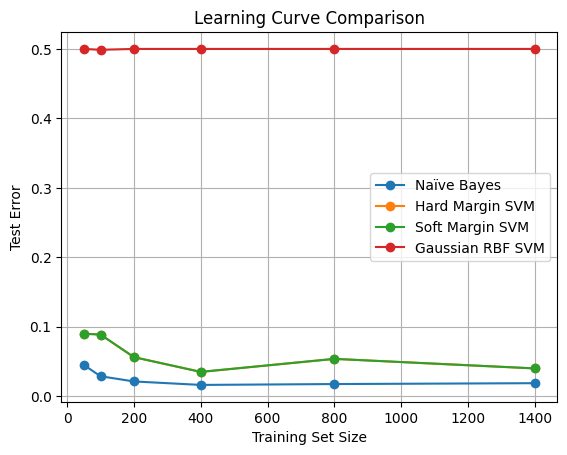

In [23]:
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# ... (Code for Naïve Bayes)
def nb_train(matrix, category):
    state = {}
    N = matrix.shape[1]

    # Compute the class priors and store them in state['class_priors']
    num_spam = np.sum(category == 1)  # Number of spam documents in the training set
    num_ham = np.sum(category == -1)   # Number of non-spam (ham) documents
    total_documents = len(category)     # Total number of documents

    state['class_priors'] = {
        'spam': (num_spam + 1) / (total_documents + 2),  # Laplace smoothing for class priors
        'ham': (num_ham + 1) / (total_documents + 2)
    }

    # Initialize dictionaries to store token counts for each class
    token_counts_spam = np.ones(N)  # Laplace smoothing for token counts
    token_counts_ham = np.ones(N)

    # Iterate over training documents and update token counts
    for i in range(total_documents):
        if category[i] == 1:  # Spam
            token_counts_spam += matrix[i]
        else:  # Ham
            token_counts_ham += matrix[i]

    # Compute the conditional probabilities for each token and each class
    # using Laplace smoothing and store them in state['log_probabilities']
    state['log_probabilities'] = {
        'spam': np.log(token_counts_spam / (np.sum(token_counts_spam) + N)),  # Laplace smoothing for probabilities
        'ham': np.log(token_counts_ham / (np.sum(token_counts_ham) + N))
    }

    return state

def nb_test(matrix, state):
    output = np.zeros(matrix.shape[0])

    # Iterate over test instances and classify them
    for i in range(matrix.shape[0]):
        log_likelihood_spam = np.sum(matrix[i] * state['log_probabilities']['spam'])
        log_likelihood_ham = np.sum(matrix[i] * state['log_probabilities']['ham'])

        # Compute the log-odds and assign the class with higher log-odds as the prediction
        log_odds_spam = log_likelihood_spam + np.log(state['class_priors']['spam'])
        log_odds_ham = log_likelihood_ham + np.log(state['class_priors']['ham'])

        if log_odds_spam > log_odds_ham:
            output[i] = 1  # Predicted as spam
        else:
            output[i] = -1  # Predicted as ham

    return output

def svm_readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    category = (np.array(Y) * 2) - 1
    return matrix, tokens, category

def svm_test(svm, matrix):
    output = svm.predict(matrix)
    return output

def svm_evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    return error

def main():
    # Load test data once since it doesn't change
    testMatrix, _, testCategory = svm_readMatrix('./hw2_MATRIX.TEST')

    # Initialize lists to store test errors for different algorithms
    test_errors_nb = []
    test_errors_hard_svm = []
    test_errors_soft_svm = []
    test_errors_rbf_svm = []

    # Create a StandardScaler for scaling the data
    scaler = StandardScaler()

    # Loop through different training set sizes
    for train_size in training_set_sizes:
        # Construct the path to the training file based on the current size
        train_file = f'./hw2_MATRIX.TRAIN.{train_size}'

        # Read the training data for the current size
        trainMatrix, _, trainCategory = svm_readMatrix(train_file)

        # Train the Naïve Bayes classifier
        state = nb_train(trainMatrix, trainCategory)

        # Test the Naïve Bayes classifier
        output_nb = nb_test(testMatrix, state)

        # SVM Classifier model

        # Hard margin SVM
        svm_clf_hard = SVC(kernel="linear", C=1e10, max_iter=10_000, random_state=42)

        # Soft margin SVM
        # Find out the best parameters of C, max_iter, and so on
        svm_clf_soft = SVC(kernel="linear", C=1, max_iter=10_000, random_state=42)

        # Gaussian RBF SVM
        # Find out the best parameters of gamma, C, max_iter, and so on
        svm_clf_rbf = SVC(kernel="rbf", gamma=8, C=0.001, max_iter=10_000, random_state=42)

        scaler = StandardScaler()

        # Train the SVMs
        scaled_svm_clf_hard = make_pipeline(scaler, svm_clf_hard)
        scaled_svm_clf_soft = make_pipeline(scaler, svm_clf_soft)
        scaled_svm_clf_rbf = make_pipeline(scaler, svm_clf_rbf)

        scaled_svm_clf_hard.fit(trainMatrix, trainCategory)
        scaled_svm_clf_soft.fit(trainMatrix, trainCategory)
        scaled_svm_clf_rbf.fit(trainMatrix, trainCategory)

        # Test the SVMs
        output_hard = svm_test(scaled_svm_clf_hard, testMatrix)
        output_soft = svm_test(scaled_svm_clf_soft, testMatrix)
        output_rbf = svm_test(scaled_svm_clf_rbf, testMatrix)

        # Calculate and store test errors for each algorithm
        error_nb = svm_evaluate(output_nb, testCategory)
        error_hard_svm = svm_evaluate(output_hard, testCategory)
        error_soft_svm = svm_evaluate(output_soft, testCategory)
        error_rbf_svm = svm_evaluate(output_rbf, testCategory)

        test_errors_nb.append(error_nb)
        test_errors_hard_svm.append(error_hard_svm)
        test_errors_soft_svm.append(error_soft_svm)
        test_errors_rbf_svm.append(error_rbf_svm)

        print(f"Training set size: {train_size}")
        print(f"Naïve Bayes Test Error: {error_nb:.4f}")
        print(f"Hard Margin SVM Test Error: {error_hard_svm:.4f}")
        print(f"Soft Margin SVM Test Error: {error_soft_svm:.4f}")
        print(f"Gaussian RBF SVM Test Error: {error_rbf_svm:.4f}")

    # Plot the learning curves for all algorithms
    plt.figure()
    plt.plot(training_set_sizes, test_errors_nb, marker='o', linestyle='-', label='Naïve Bayes')
    plt.plot(training_set_sizes, test_errors_hard_svm, marker='o', linestyle='-', label='Hard Margin SVM')
    plt.plot(training_set_sizes, test_errors_soft_svm, marker='o', linestyle='-', label='Soft Margin SVM')
    plt.plot(training_set_sizes, test_errors_rbf_svm, marker='o', linestyle='-', label='Gaussian RBF SVM')
    plt.title('Learning Curve Comparison')
    plt.xlabel('Training Set Size')
    plt.ylabel('Test Error')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()


# 3. K-means Clustering

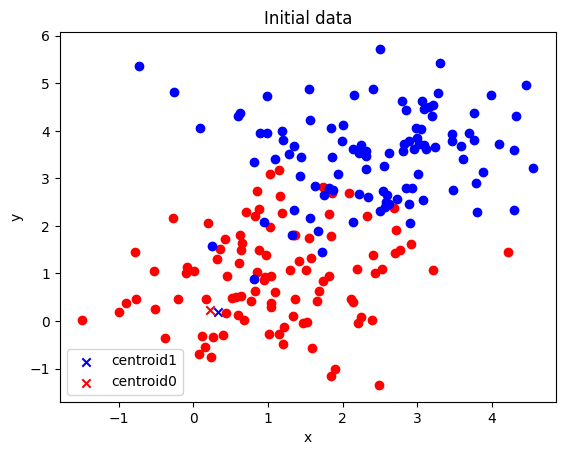

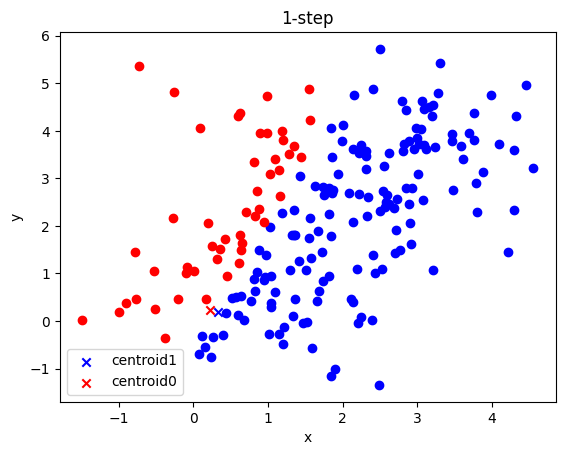

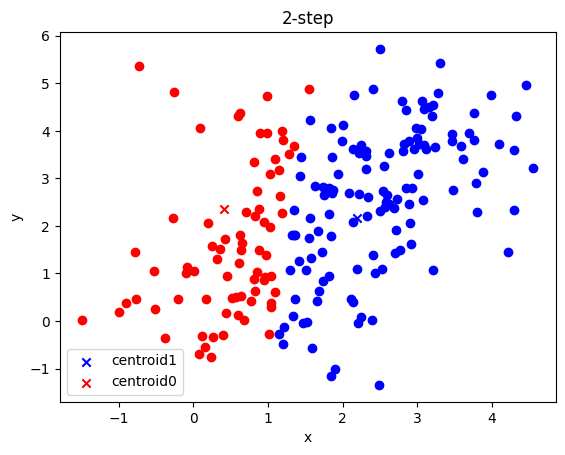

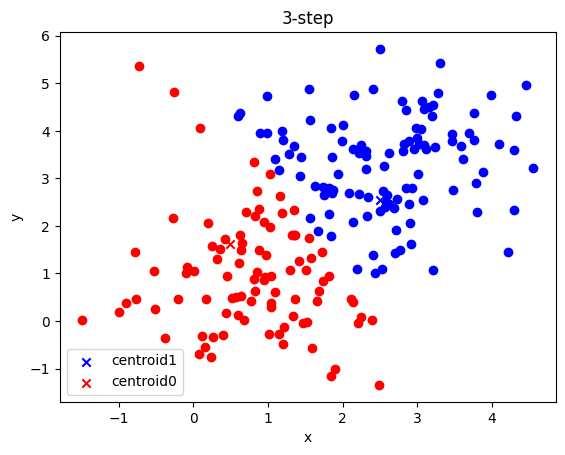

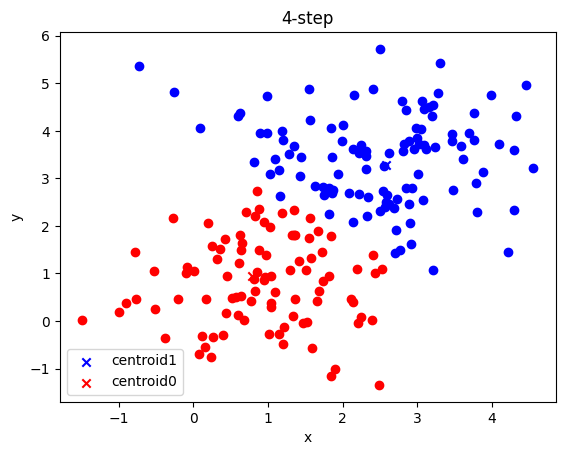

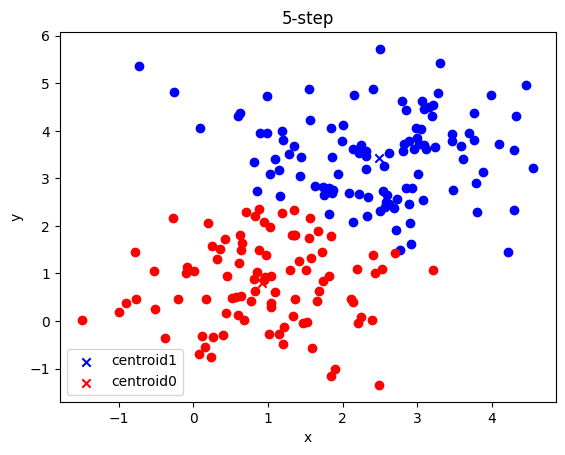

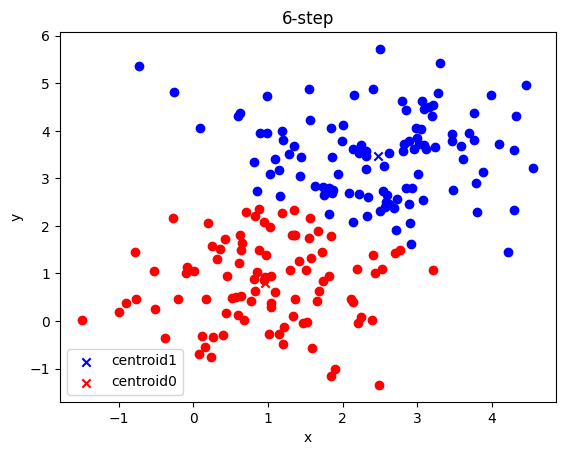

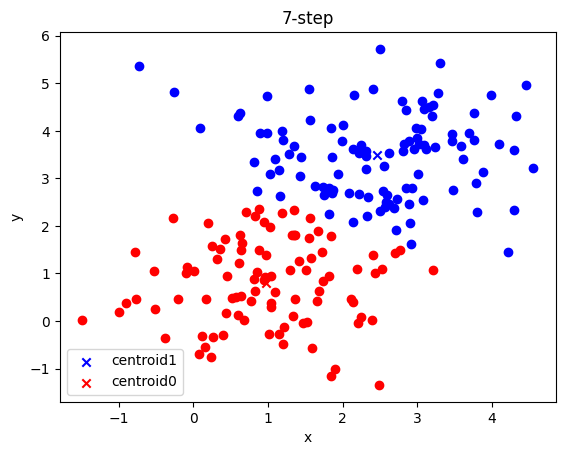

[2.4654057157703346, 3.4866074848568416] [0.9779950800761219, 0.8021741715825688]


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

center = pd.read_csv('hw2_2d_init_centroids.csv', header=None, names=['x', 'y'])
data = pd.read_csv('hw2_data_2d.csv', header=None, names=['clustered_sort','x', 'y'])

# centroids a, b
a = [center['x'][0], center['y'][0]]
b = [center['x'][1], center['y'][1]]

# divide the data into 2 clusters
zero_lst = data[data['clustered_sort']==0]
one_lst = data[data['clustered_sort']==1]

# show initial plot
plt.scatter([a[0]], [a[1]], c='b', marker='x', label='centroid1')
plt.scatter([b[0]], [b[1]], c='r', marker='x', label='centroid0')
plt.scatter(zero_lst['x'], zero_lst['y'], c='r')
plt.scatter(one_lst['x'], one_lst['y'], c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial data')
plt.legend()
plt.show()

def k_means_clustering(cen_a, cen_b, data, cnt):
    a_lst_x, a_lst_y = [] , []
    b_lst_x, b_lst_y = [] , []

    for i in range(len(data)):
        dista = np.sqrt((data['x'][i]-cen_a[0])**2 + (data['y'][i]-cen_a[1])**2)
        distb = np.sqrt((data['x'][i]-cen_b[0])**2 + (data['y'][i]-cen_b[1])**2)

        if dista >= distb:
            b_lst_x.append(data['x'][i])
            b_lst_y.append(data['y'][i])
        else:
            a_lst_x.append(data['x'][i])
            a_lst_y.append(data['y'][i])

    plt.scatter([cen_a[0]], [cen_a[1]], c='b', marker='x', label='centroid1')
    plt.scatter([cen_b[0]], [cen_b[1]], c='r', marker='x', label='centroid0')
    plt.scatter(a_lst_x, a_lst_y, c='b')
    plt.scatter(b_lst_x, b_lst_y, c='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{cnt}-step')
    plt.legend()
    plt.show()

    new_a = [np.average(a_lst_x), np.average(a_lst_y)]
    new_b = [np.average(b_lst_x), np.average(b_lst_y)]
    return new_a, new_b

cnt = 1
a = [center['x'][0], center['y'][0]]
b = [center['x'][1], center['y'][1]]

while 1:
    new_a, new_b = k_means_clustering(a, b, data, cnt)

    if ((new_a[0] - a[0])** 2 + (new_a[1] - a[1])** 2) **(1/2) <= 10**(-5) \
       and ((new_b[0] - b[0])** 2 + (new_b[1] - b[1])** 2) **(1/2) <= 10**(-5):
        print(new_a,new_b)
        break
    else:
        a = new_a
        b = new_b
        cnt+= 1
